<a href="https://colab.research.google.com/github/OlegDenisenko/Data-analyst-Step1k/blob/main/7.%20A%D0%BDa%D0%BBu%D1%82u%D0%BA_%D0%B4a%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D0%BF_St%D0%B5%D1%80uk..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Мини-проект**

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (те, кто разместил эти объявления).

ads_data.csv – данные взаимодействий с рекламными объявлениями
date – дата
time – время
event – действие (просмотр/клик)
platform – платформа
ad_id – id объявления
client_union_id – id рекламного кабинета
campaign_union_id – id рекламной кампании
ad_cost_type – тип оплаты
ad_cost – цена
has_video – есть ли видео
target_audience_count – размер аудитории

ads_clients_data.csv – характеристики рекламных клиентов
date – дата
client_union_id – id рекламного кабинета
community_id – id сообщества
create_date – дата создания рекламного клиента

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_data = '/content/sample_data/ads_data.csv'
path_clients = '/content/sample_data/ads_clients_data.csv'

In [3]:
ads_data = pd.read_csv(path_data)
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061.0,34734.0,45061.0,CPM,200.6,0.0,1955269.0
1,2019-04-01,2019-04-01 00:00:48,view,web,121288.0,121288.0,121288.0,CPM,187.4,0.0,232011.0
2,2019-04-01,2019-04-01 00:01:03,view,android,102737.0,102535.0,102564.0,CPC,60.7,0.0,4410.0
3,2019-04-01,2019-04-01 00:01:03,view,android,107564.0,106914.0,107564.0,CPM,217.3,0.0,62711.0
4,2019-04-01,2019-04-01 00:01:09,view,android,4922.0,37.0,4400.0,CPC,60.1,0.0,1183501.0


In [4]:
ads_clients = pd.read_csv(path_clients)
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [5]:
number_per_ad_per_event = ads_data.groupby(['ad_id', 'event'], as_index=False)\
                                  .agg({'time': 'count'})\
                                  .rename(columns={'time': 'event_number'})

In [6]:
number_per_ad_per_event.head()

,ad_id,event,event_number
0,2.0,click,1
1,2.0,view,101
2,3.0,click,3
3,3.0,view,184
4,1902.0,click,1


Для корректного расчёта нужно добавить нулевые значения кликов

In [7]:
pivot_per_ad_events = number_per_ad_per_event.pivot(index='ad_id',
                                                    columns='event',
                                                    values='event_number')\
                                                    .fillna(0)

In [8]:
pivot_per_ad_events.head()

event,click,view
ad_id,,
2.0,1.0,101.0
3.0,3.0,184.0
1902.0,1.0,41.0
2064.0,0.0,35.0
2132.0,1.0,53.0


In [9]:
pivot_per_ad_events.mean().round(0)

event
click     72.0
view     690.0
dtype: float64

Нарисуйте график распределения показов на объявление за весь период.

In [10]:
views_per_ad = number_per_ad_per_event.query('event == "view"')

In [11]:
views_per_ad['log_views']= np.log(views_per_ad.event_number)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
sns.set(
    font_scale = 2,
    style = 'whitegrid',
    rc= {'figure.figsize': (20,12)}
)

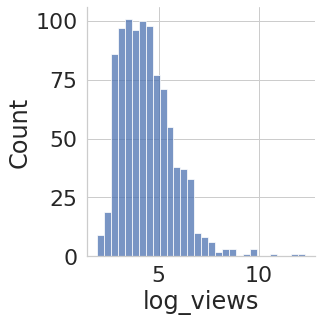

In [13]:
sns.displot(views_per_ad.log_views);

А теперь давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

In [14]:
ads_view_per_day = ads_data.query('event == "view"')\
                        .pivot_table(index = 'ad_id',
                                    columns = 'date',
                                    values = 'time',
                                    aggfunc = 'count')

In [15]:
mean_views = ads_view_per_day.mean()

In [16]:
rolling_views = ads_view_per_day.mean().rolling(2).mean()

In [17]:
rolling_views['2019-04-05'].round()

611.0

*Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [18]:
full_data = ads_data.merge(ads_clients.drop(columns= ['date', 'community_id']))
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061.0,34734.0,45061.0,CPM,200.6,0.0,1955269.0,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061.0,34734.0,45061.0,CPM,200.6,0.0,1955269.0,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061.0,34734.0,45061.0,CPM,200.6,0.0,1955269.0,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061.0,34734.0,45061.0,CPM,200.6,0.0,1955269.0,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061.0,34734.0,45061.0,CPM,200.6,0.0,1955269.0,2018-12-04


In [19]:
full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime)

In [20]:
full_data.groupby('client_union_id').apply(lambda group: group.date-group.create_date).mean()

Timedelta('109 days 05:04:47.154476728')

*Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))


In [21]:
def find_minimum_diff(group):
  diff = group.date-group.create_date
  return diff.min()

Данные о разнице между временем времени создания кабинетов и первого запуска рекламы

In [22]:
creation_difference = full_data.groupby('client_union_id').apply(find_minimum_diff)

Теперь нужно отобрать тех клиентов, у которых разница меньше 365

In [23]:
threshold = pd.to_timedelta(365, unit ='d')
threshold

Timedelta('365 days 00:00:00')

In [24]:
creation_difference = creation_difference.loc[creation_difference < threshold]

In [25]:
round(creation_difference.shape[0]/ ads_clients.client_union_id.nunique() *100, 2)

0.69

*Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [28]:
bins = pd.to_timedelta([0, 30, 90, 180, 365], unit='d')

In [33]:
creation_difference_groups = pd.cut(creation_difference, bins, labels=['0-30', '30-90', '90-180', '180-365'])

In [45]:
creation_difference_groups.value_counts()

90-180     396
30-90      263
180-365    168
0-30        11
dtype: int64

*А теперь давайте выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [32]:
import plotly.express as px

In [ ]:
px.bar(creation_difference_groups.value_counts())